## Proyek Machine Learning Prediksi Hasil Panen - Natalio Michael Tumuahi

Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
%matplotlib inline

Data Loading


In [2]:
url = 'https://raw.githubusercontent.com/natalio123/prediksi_hasil_panen/master/dataset/crop_yield.csv'
df = pd.read_csv(url)
df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


### Explanatory Data Analysis

In [3]:
# Deskripsi variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [4]:
df.describe(include='all')

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
count,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000,1000000,1000000,1000000.000000,1000000.000000
unique,4,6,6,NaN,NaN,2,2,3,NaN,NaN
top,North,Sandy,Maize,NaN,NaN,False,False,Sunny,NaN,NaN
freq,250173,167119,166824,NaN,NaN,500060,500509,333790,NaN,NaN
mean,NaN,NaN,NaN,549.981901,27.504965,NaN,NaN,NaN,104.495025,4.649472
std,NaN,NaN,NaN,259.851320,7.220608,NaN,NaN,NaN,25.953412,1.696572
min,NaN,NaN,NaN,100.000896,15.000034,NaN,NaN,NaN,60.000000,-1.147613
25%,NaN,NaN,NaN,324.891090,21.254502,NaN,NaN,NaN,82.000000,3.417637
50%,NaN,NaN,NaN,550.124061,27.507365,NaN,NaN,NaN,104.000000,4.651808
75%,NaN,NaN,NaN,774.738520,33.753267,NaN,NaN,NaN,127.000000,5.879200


In [5]:
# cek nilai missing value
missing_percent = df.isnull().mean() * 100
missing_percent

,0
Region,0.0
Soil_Type,0.0
Crop,0.0
Rainfall_mm,0.0
Temperature_Celsius,0.0
Fertilizer_Used,0.0
Irrigation_Used,0.0
Weather_Condition,0.0
Days_to_Harvest,0.0
Yield_tons_per_hectare,0.0


In [6]:
# cek duplicate
duplikat = df.duplicated().sum()
duplikat

np.int64(0)

<Axes: xlabel='Crop'>

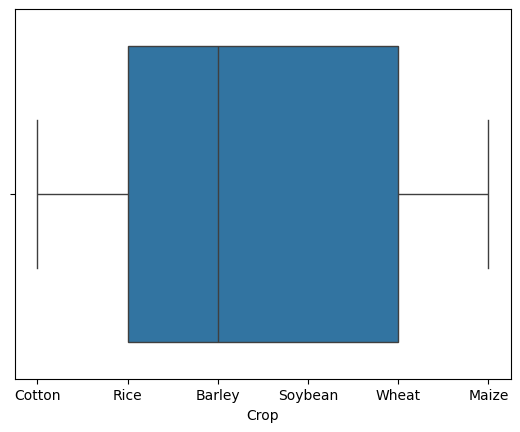

In [7]:
# Cek outliers
sns.boxplot(x=df['Crop'])

<Axes: xlabel='Days_to_Harvest'>

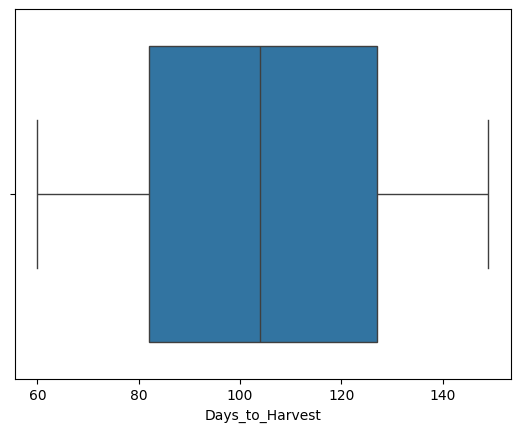

In [8]:
sns.boxplot(x= df['Days_to_Harvest'])

<Axes: xlabel='Fertilizer_Used'>

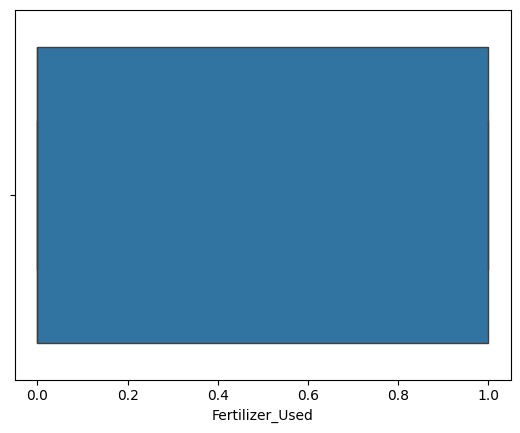

In [9]:
sns.boxplot(x=df['Fertilizer_Used'])

<Axes: xlabel='Soil_Type'>

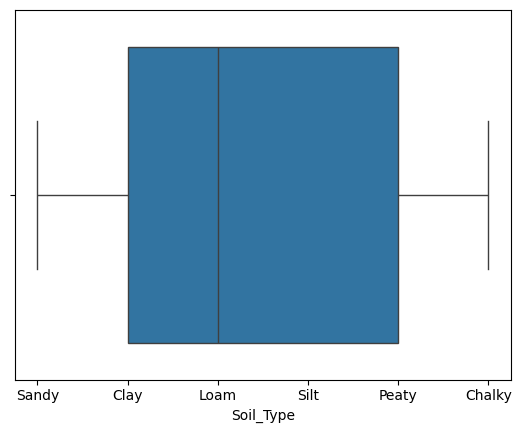

In [10]:
sns.boxplot(x=df['Soil_Type'])

<Axes: xlabel='Irrigation_Used'>

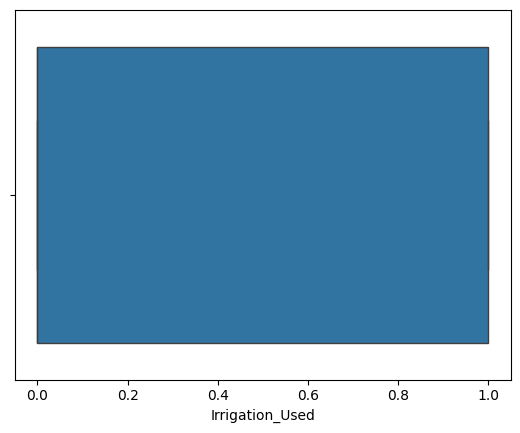

In [11]:
sns.boxplot(x=df['Irrigation_Used'])

<Axes: xlabel='Rainfall_mm'>

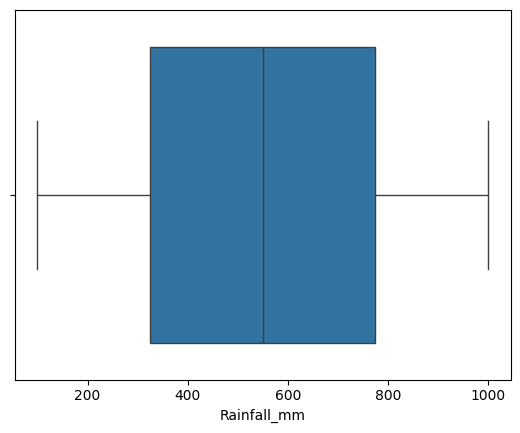

In [12]:
sns.boxplot(x=df['Rainfall_mm'])

<Axes: xlabel='Region'>

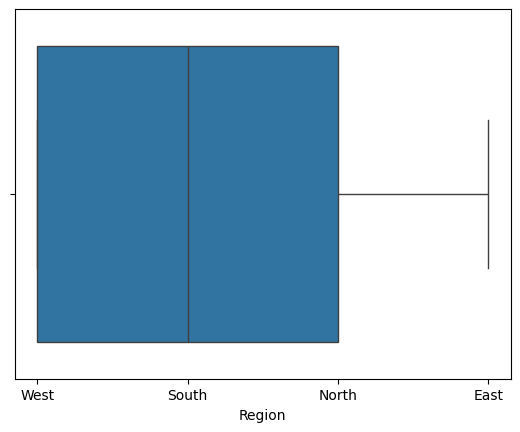

In [13]:
sns.boxplot(x=df['Region'])

<Axes: xlabel='Temperature_Celsius'>

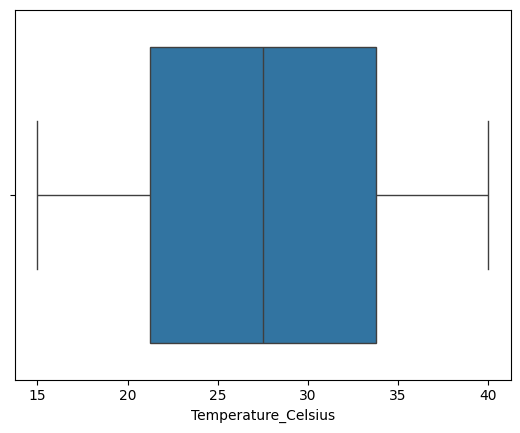

In [14]:
sns.boxplot(x=df['Temperature_Celsius'])

<Axes: xlabel='Weather_Condition'>

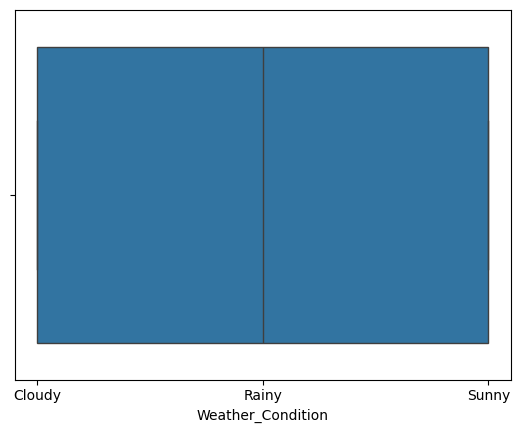

In [15]:
sns.boxplot(x=df['Weather_Condition'])

<Axes: xlabel='Yield_tons_per_hectare'>

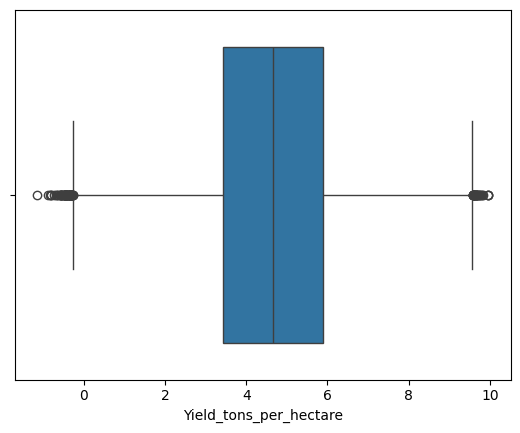

In [16]:
sns.boxplot(x=df['Yield_tons_per_hectare'])

In [17]:
df_numeric = df['Yield_tons_per_hectare']
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))]

# cek ukuran dataset
df.shape

(999916, 10)

In [18]:
# Univariate EDA
numerical_features = ['Days_to_Harvest', 'Rainfall_mm', 'Temperature_Celsius', 'Yield_tons_per_hectare']
categorical_features = ['Crop', 'Irrigation_Used', 'Soil_Type','Fertilizer_Used', 'Weather_Condition', 'Region']

         Jumlah sampel  persentase
Crop                              
Maize           166813        16.7
Rice            166782        16.7
Barley          166762        16.7
Wheat           166652        16.7
Cotton          166569        16.7
Soybean         166338        16.6


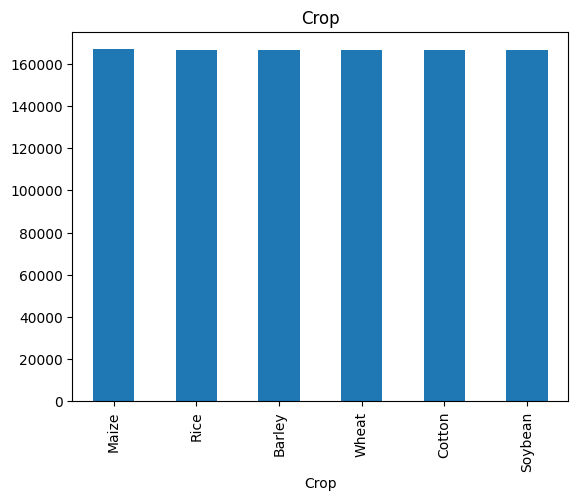

In [19]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'Jumlah sampel': count, 'persentase': percent.round(1)})
print(df_baru)
count.plot(kind='bar', title=feature);

                 Jumlah sampel  persentase
Irrigation_Used                           
False                   500453        50.0
True                    499463        50.0


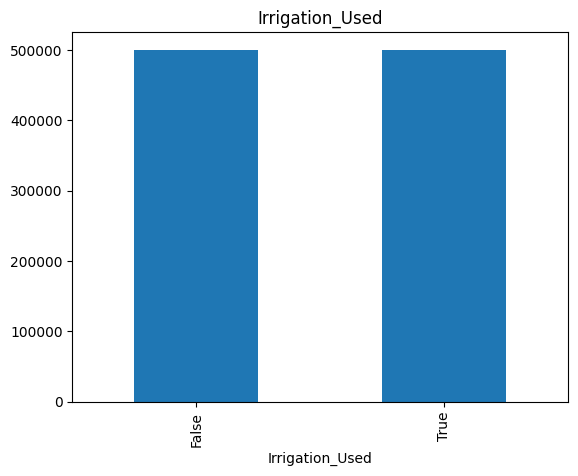

In [20]:
# Fitur Irrigation Used
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'Jumlah sampel': count, 'persentase': percent.round(1)})
print(df_baru)
count.plot(kind='bar', title=feature);

           Jumlah sampel  persentase
Soil_Type                           
Sandy             167105        16.7
Loam              166780        16.7
Chalky            166762        16.7
Silt              166663        16.7
Clay              166335        16.6
Peaty             166271        16.6


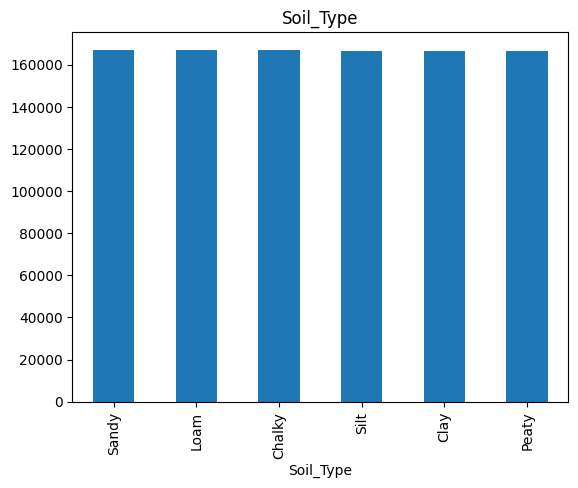

In [21]:
# Fitur Soil_Type
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'Jumlah sampel': count, 'persentase': percent.round(1)})
print(df_baru)
count.plot(kind='bar', title=feature);

                 Jumlah sampel  persentase
Fertilizer_Used                           
False                   500004        50.0
True                    499912        50.0


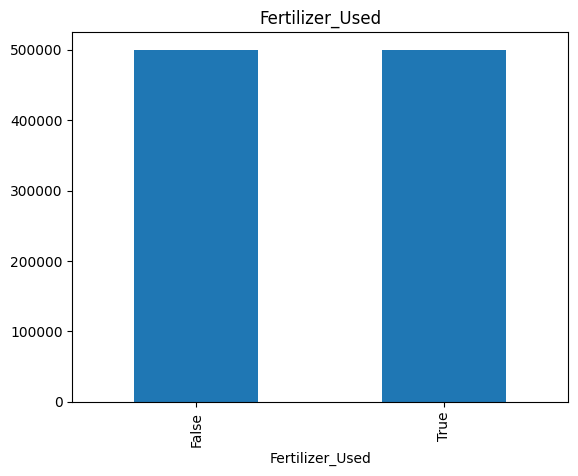

In [22]:
# Fertilizer_Used
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'Jumlah sampel': count, 'persentase': percent.round(1)})
print(df_baru)
count.plot(kind='bar', title=feature);

                   Jumlah sampel  persentase
Weather_Condition                           
Sunny                     333761        33.4
Rainy                     333533        33.4
Cloudy                    332622        33.3


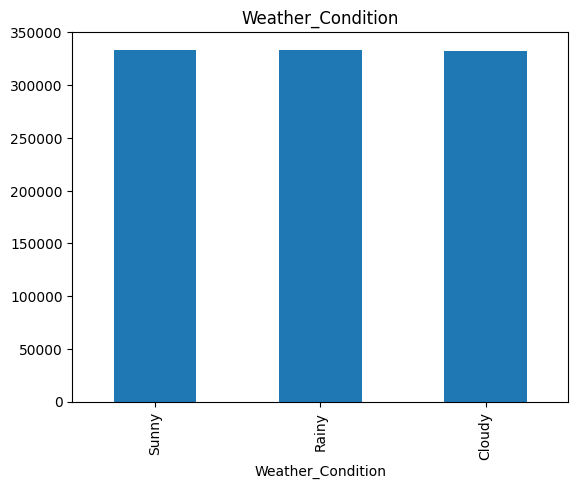

In [23]:
# Weather_Condition
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'Jumlah sampel': count, 'persentase': percent.round(1)})
print(df_baru)
count.plot(kind='bar', title=feature);

        Jumlah sampel  persentase
Region                           
North          250152        25.0
West           250047        25.0
South          250036        25.0
East           249681        25.0


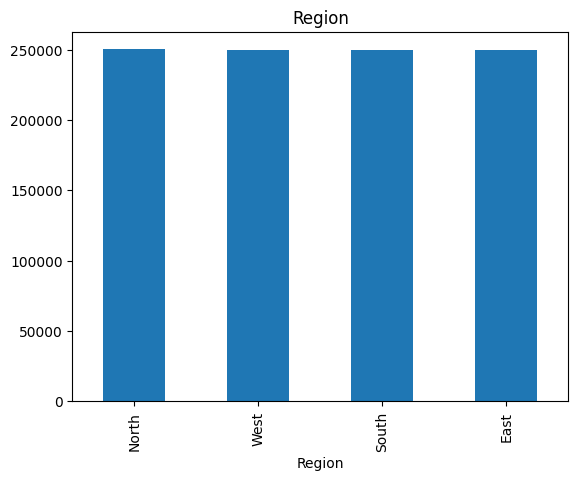

In [24]:
# Fitur Region
feature = categorical_features[5]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'Jumlah sampel': count, 'persentase': percent.round(1)})
print(df_baru)
count.plot(kind='bar', title=feature);

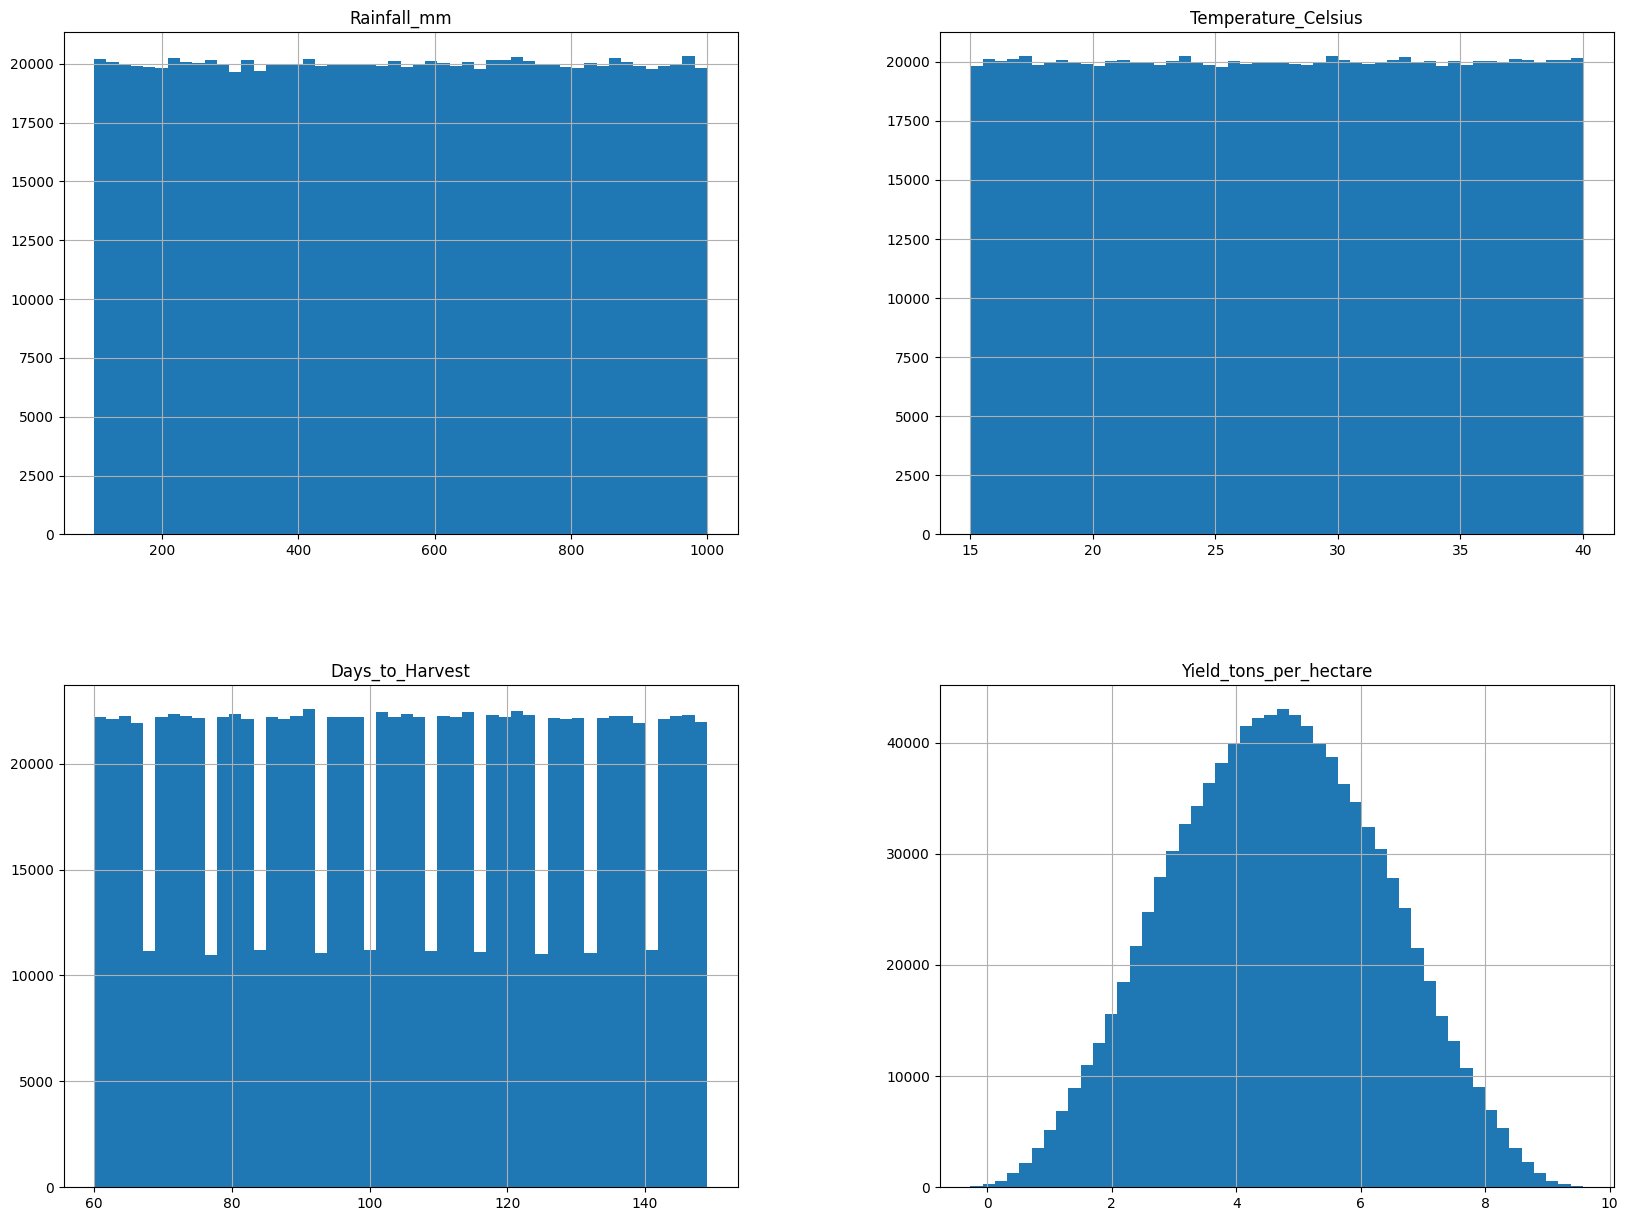

In [25]:
# Numerical features
df.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-26-a9dcd5f5da16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Yield_tons_per_hectare', kind='bar', dodge=False, data=df, aspect=2, height=3, palette='Set3')
<ipython-input-26-a9dcd5f5da16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Yield_tons_per_hectare', kind='bar', dodge=False, data=df, aspect=2, height=3, palette='Set3')
<ipython-input-26-a9dcd5f5da16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Yield_tons_per_hectare', kind='bar', dodge=False, data=df, aspect=2, height=3, palet

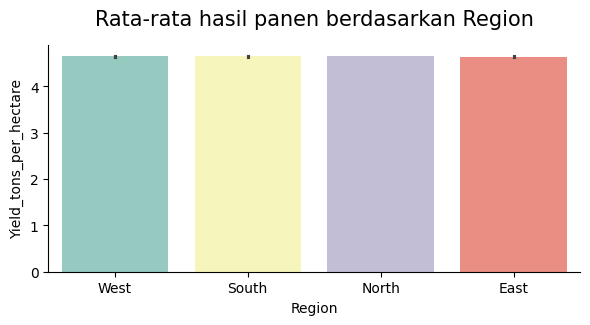

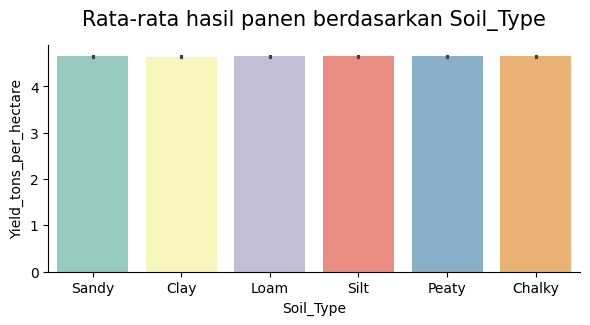

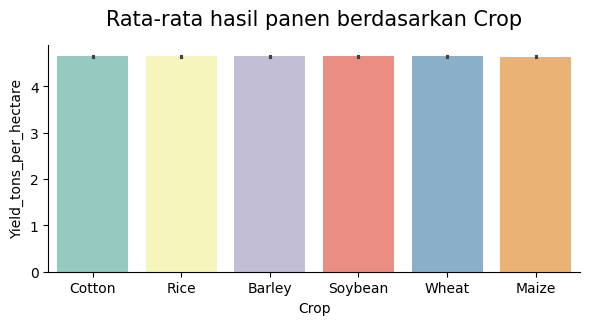

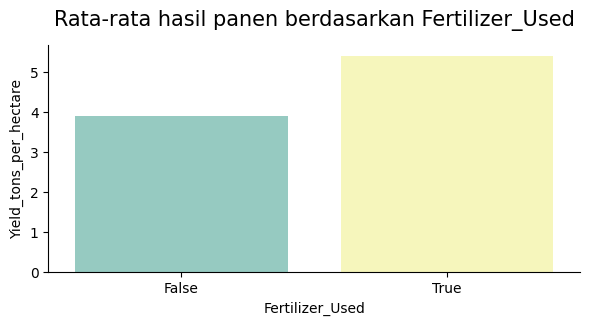

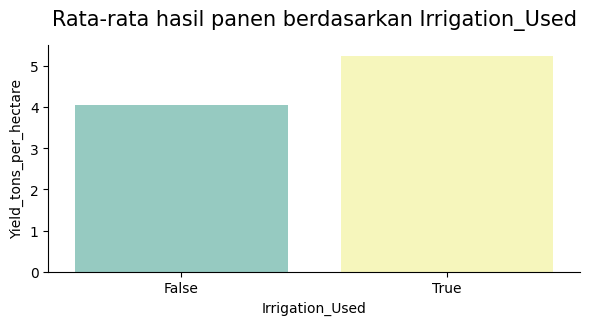

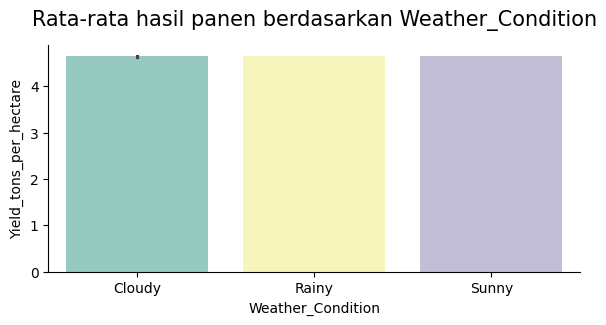

In [26]:
# Multivariate EDA
cat_features = df.select_dtypes(include=['object', 'bool']).columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='Yield_tons_per_hectare', kind='bar', dodge=False, data=df, aspect=2, height=3, palette='Set3')
  plt.title(f'Rata-rata hasil panen berdasarkan {col}', y=1.05, size=15)

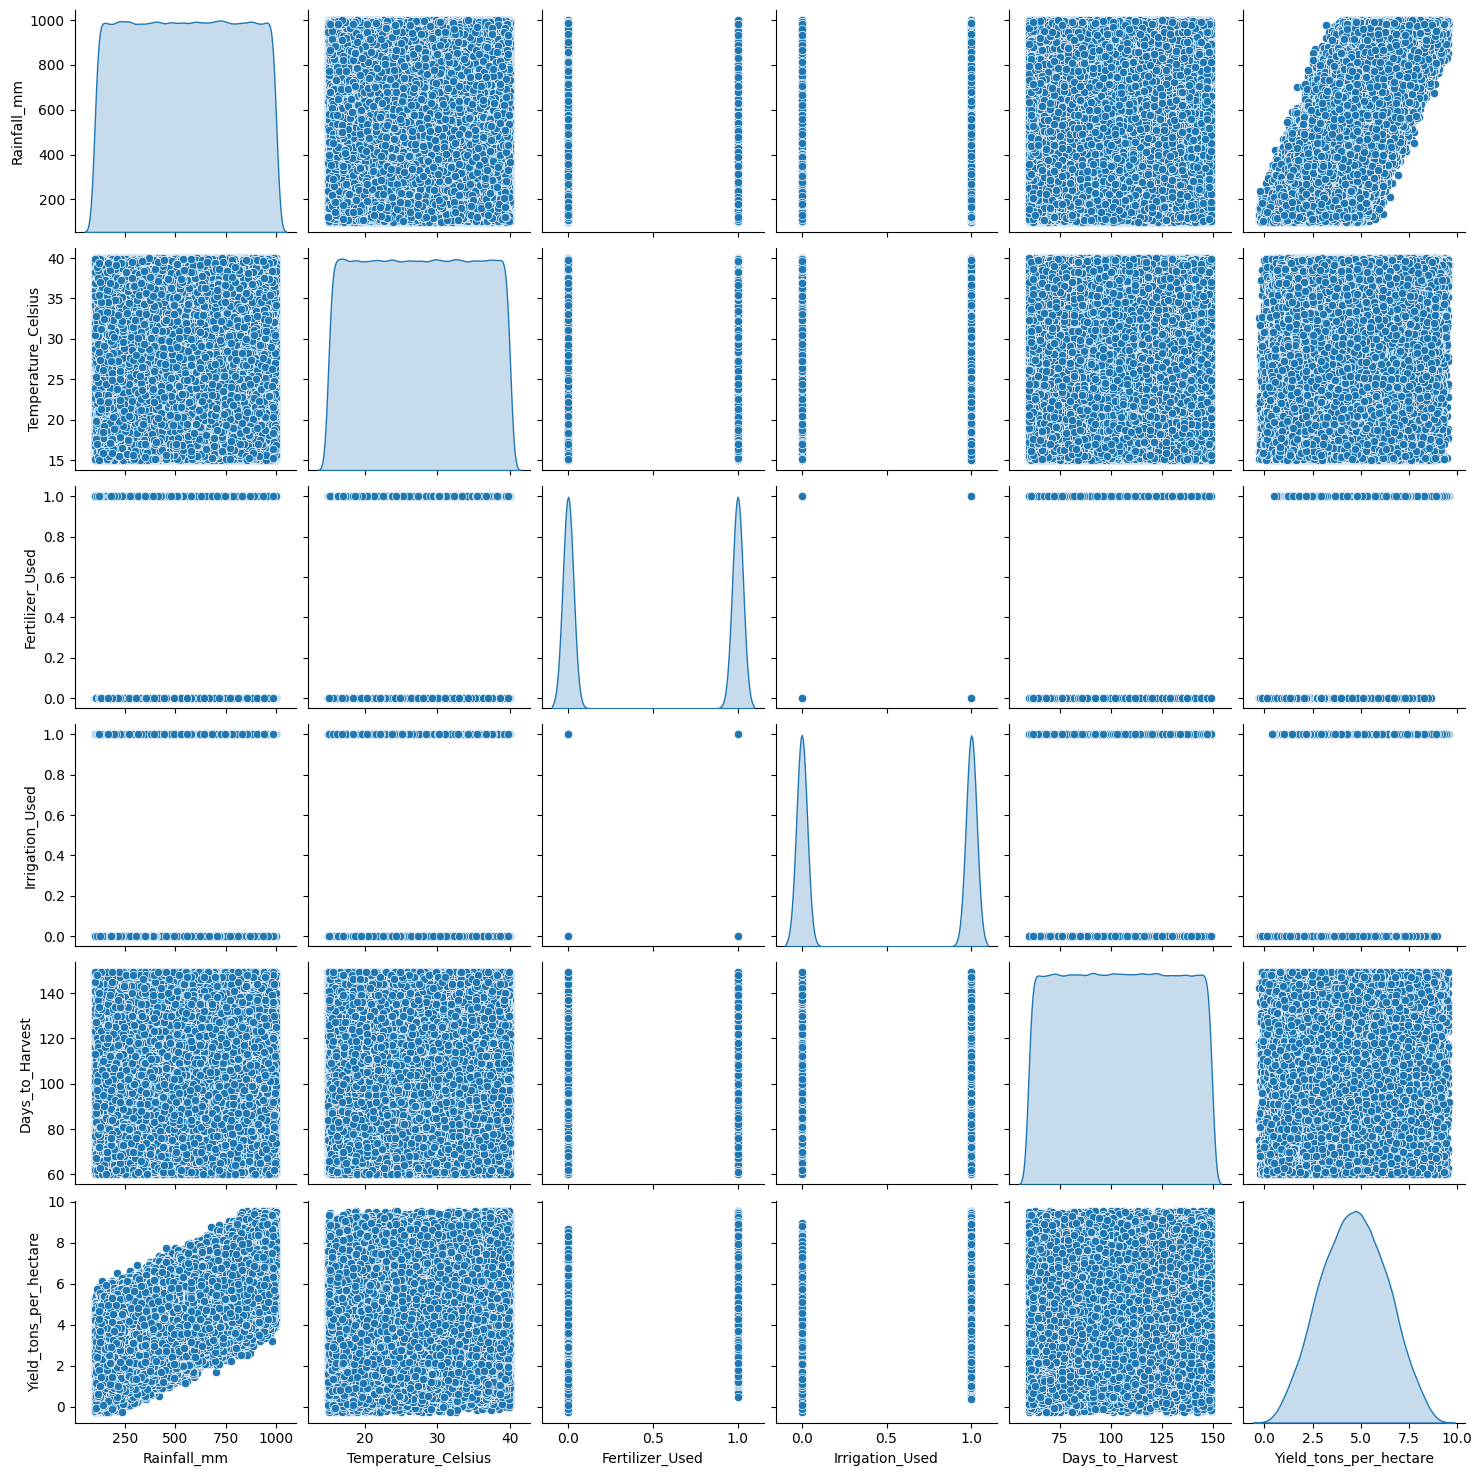

In [27]:
# Numerical Features
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

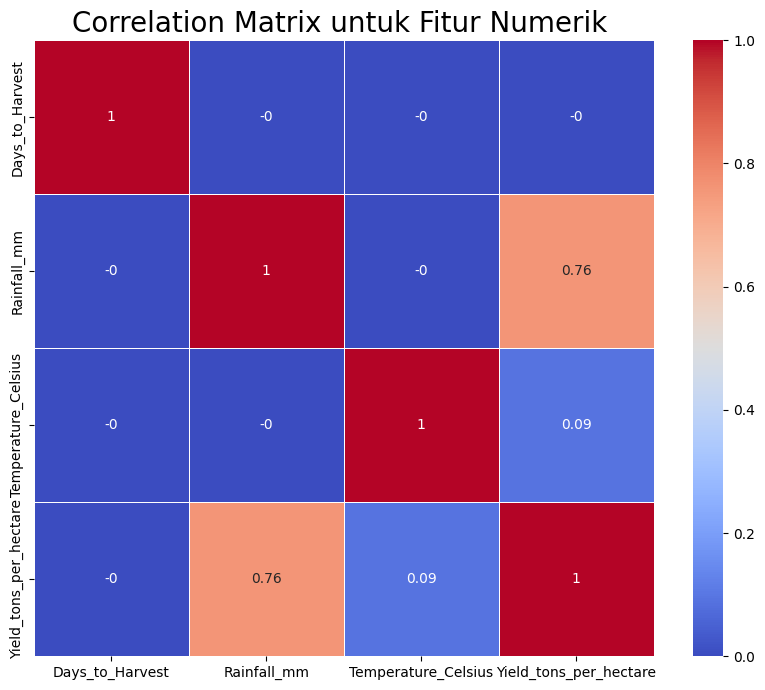

In [28]:
plt.figure(figsize=(10,8))
correlation_matrix = df[numerical_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,)
plt.title('Correlation Matrix untuk Fitur Numerik ', size=20)

## Data Preparation

In [29]:
# Encoding Fitur Kategori
df = pd.concat([df, pd.get_dummies(df['Crop'], prefix='Crop')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Region'], prefix='Region')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Soil_Type'], prefix='Soil_Type')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Fertilizer_Used'], prefix='Fertilizer_Used')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Irrigation_Used'], prefix='Irrigation_Used')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Weather_Condition'], prefix='Weather_Condition')], axis=1)
df.drop(['Crop', 'Region', 'Soil_Type', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition'], axis=1, inplace=True)
df.head()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Fertilizer_Used_False,Fertilizer_Used_True,Irrigation_Used_False,Irrigation_Used_True,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,122,6.555816,False,True,False,False,False,False,...,False,True,False,True,False,False,True,True,False,False
1,992.673282,18.026142,140,8.527341,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
2,147.998025,29.794042,106,1.127443,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
3,986.866331,16.644190,146,6.517573,False,False,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,730.379174,31.620687,110,7.248251,False,False,False,False,False,True,...,False,False,True,False,True,False,True,True,False,False


In [30]:
# Train-Test-Split
X = df.drop(['Yield_tons_per_hectare'], axis=1)
y= df['Yield_tons_per_hectare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Mengecek jumlah sampel pada masing-masing bagian
print(f'Jumlah sampel X_train: {X_train.shape[0]}, Jumlah sampel y_train: {y_train.shape[0]}')
print(f'Jumlah sampel X_test: {X_test.shape[0]}, Jumlah sampel y_test: {y_test.shape[0]}')

Jumlah sampel X_train: 799932, Jumlah sampel y_train: 799932
Jumlah sampel X_test: 199984, Jumlah sampel y_test: 199984


In [32]:
# Standarisasi
numerical_features = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_train[numerical_features].head()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest
638188,-1.053917,1.216808,0.482429
463031,1.321820,1.457435,1.021788
145951,0.462717,0.554104,0.097174
33479,-0.627447,-0.799916,-0.981542
360784,-1.071111,-0.981559,-0.673338


In [33]:
X_train[numerical_features].describe().round(4)

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest
count,799932.0000,799932.0000,799932.0000
mean,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.7318,-1.7311,-1.7135
25%,-0.8659,-0.8660,-0.8660
50%,0.0006,0.0013,-0.0184
75%,0.8653,0.8653,0.8677
max,1.7312,1.7303,1.7152


Model Development

In [34]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns = ['Random Forest', 'Linear Regression'])

Random Forest

In [35]:
RF = RandomForestRegressor(n_estimators = 50, max_depth = 14, random_state = 123, n_jobs = -1)
RF.fit(X_train, y_train)

models.loc['train_mse','Random Forest'] = mean_squared_error(y_pred = RF.predict(X_train), y_true=y_train)

Linear Regression

In [36]:
LN = LinearRegression()
LN.fit(X_train, y_train)

models.loc['train_mse', 'Linear Regression'] = mean_squared_error(y_pred = LN.predict(X_train), y_true = y_train )

## Evaluation Model


In [37]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


<ipython-input-37-0615151fc0c1>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.36513322 -0.98154247  1.36851779 ...  1.21441548  0.90621085
 -1.02006805]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


In [38]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['RF', 'LN'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'RF': RF, 'LN' : LN}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

# Panggil mse
mse

,train,test
RF,0.21903,0.252526
LN,0.25041,0.249836


Dapat dilihat dari test mse terlihat bahwa RF sedikit lebih akurat di training data

In [39]:
# Uji
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true': y_test[:1]}
for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi).round(4)

pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_LN
382393,1.676764,2.0001,1.9957


Kesimpulannya


*   Random Forest sedikit lebih unggul prediksi akurasi
*  Tidak ada overfitting signifikan, kedua model generalisasi cukup baik

*   Model bisa digunakan untuk membantu estimasi hasil panen dari data cuaca, mendukung perencanaan pertanian yang lebih efisien.


